## Assignment #5 ECBM E4070 Handout 2022

*Author:* Shashwat Shukla

  Name: Suheyla Tozan, Vanshika Sriram, Ivan Rivera
  Uni: stt2126, vs2668, ier2112

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

np.random.seed(0) # set random seed


In [14]:
# utility function to delete networkx graph attributes
def remove_attribute(G, attr):
    for n in G.nodes:
        G.nodes[n].pop(attr)

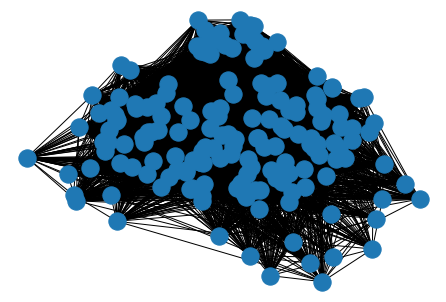

In [15]:
# preprocess original graph
G = nx.read_gpickle("eb.gpickle")
gcc = max(nx.connected_components(G), key=len)
G = G.subgraph(gcc) # select the largest connected component
G = nx.convert_node_labels_to_integers(G) # index with integers instead of neuron ids
remove_attribute(G, 'name') # account for conflict with pydot attribute called name
nx.draw(G)

In [16]:
# mapper filter function
#!! this is an example, replace fiedler vectors with pagerank for your submission !!#
fvalues = dict(enumerate(nx.pagerank(G, alpha=0.9)))

In [17]:
# specify mapper parameters

#!! change these to see the effect on the output mapper graph
Ncovers = 8 # number of covers/clusters 
overlap_frac = 0.8 # overlap fraction between clusters
#!!

vmin = np.min(list(fvalues.values()))
vmax = np.max(list(fvalues.values()))
centers = np.linspace(vmin,vmax,Ncovers+2)[1:-1] # centers of the covers
len_cover = (centers[1]-centers[0]) / (1 - overlap_frac) # length of a cover
covers = np.zeros((Ncovers,2))
covers[:,0] = np.maximum(centers - len_cover/2, vmin) # start of covers
covers[:,1] = np.minimum(centers + len_cover/2, vmax) # end of covers

In [18]:
# assign nodes from the original graph to nodes in the mapper graph
ret = []
idx = 0 # id of the mapper graph nodes
for k in range(Ncovers):
    filtered = list(filter(lambda v: covers[k,0] <= fvalues[v] <= covers[k,1], fvalues))
    subg = G.subgraph(filtered)
    components = nx.connected_components(subg)
    for comp in components:
        ret.append({'id':idx, 'cover':k, 'nodes':comp})
        idx += 1

In [19]:
# construct the mapper graph
mG = nx.Graph() # mapper graph
# create nodes
for c in ret:
    mG.add_node(c['id'], cover=c['cover'], num_nodes = len(c['nodes']), nodes=list(c['nodes']))
# create edges
for c1 in ret:
    for c2 in ret:
        if(c1!=c2):
            intersect = c1['nodes'].intersection(c2['nodes'])
            if(len(intersect)>0):
                mG.add_edge(c1['id'], c2['id'], weight=len(intersect))

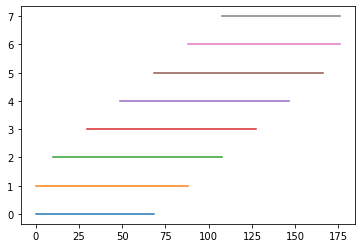

In [20]:
# plot the mapper covers
for i in range(Ncovers):
    plt.plot([covers[i,0],covers[i,1]], [i,i])
plt.show();

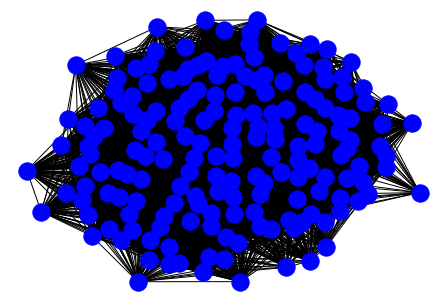

In [21]:
# plot the original graph using a force directed layout
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=pos, node_color = "blue")  # Draw the original graph

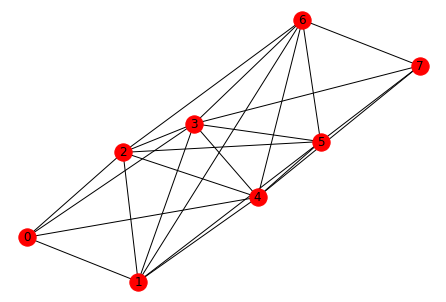

In [22]:
# plot the mapper output graph using a force directed layout
#pos = nx.kamada_kawai_layout(mG)

pos = nx.spring_layout(mG)
nx.draw(mG, pos=pos, node_color = "red", with_labels=True)



In [23]:
# compute communities for the original graph
from collections import Counter
from networkx.exception import NetworkXError
from networkx.algorithms.components import is_connected
from networkx.utils import groups
from networkx.utils import not_implemented_for
from networkx.utils import py_random_state
from networkx.algorithms.community import asyn_fluidc

k = 10
x = asyn_fluidc(G, k, max_iter=100, seed = None)



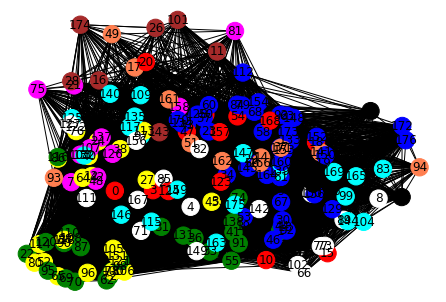

In [24]:
# plot the orignal graph with nodes labeled by a community detection algorithm

nodegroups = []

for i in x:
    nodegroups.append(list(i))


colored_nodes = []
color_list = ['blue','green','red', 'yellow','coral','brown','magenta','cyan','white','black']

for n in G:
    for a, b in enumerate(color_list):
        if n in nodegroups[a]:
            colored_nodes.append(b)

nx.draw(G, node_color=colored_nodes, with_labels=True)
plt.show()

